In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
dataset1 = pd.read_csv('heights (1).csv')
X = dataset1[['height']].values
y = dataset1[['weight']].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Name: VENKATANATHAN P R
# Register Number: 212223240173
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1,8)
    self.fc2=nn.Linear(8,10)
    self.fc3=nn.Linear(10,1)
    self.relu=nn.ReLU()
    self.history = {'loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [41]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain=NeuralNet()
criterion=nn.MSELoss()
optimizer=torch.optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [42]:
# Name: VENKATANATHAN P R
# Register Number: 212223240173
def train_model(ai_brain,X_train,y_train,criterion,optimizer,epochs=1000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss=criterion(ai_brain(X_train),y_train)
    loss.backward()
    optimizer.step()

    ai_brain.history['loss'].append(loss.item())
    if epoch % 200==0:
      print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [43]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/1000], Loss: 1722.520996
Epoch [200/1000], Loss: 1360.009277
Epoch [400/1000], Loss: 823.896790
Epoch [600/1000], Loss: 334.061371
Epoch [800/1000], Loss: 122.295776


In [44]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 522.392761


In [45]:
loss_df = pd.DataFrame(ai_brain.history)

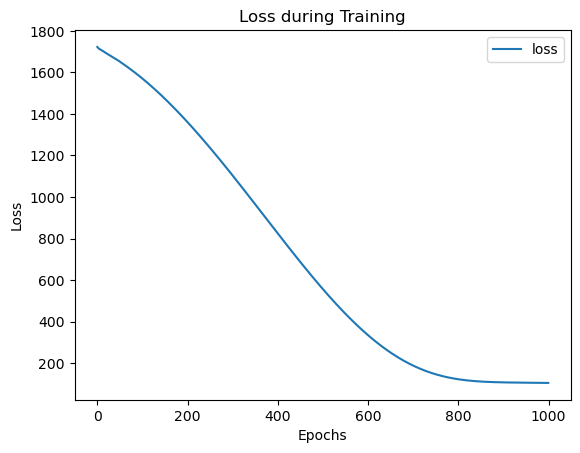

In [46]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [47]:
X_n1_1 = torch.tensor([[5.5]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 37.43804168701172
